In [1]:
# Installation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Chargement du dataset

DATA_PATH = "train.csv"
df = pd.read_csv(DATA_PATH)
print("Data:", df.shape)
df.sample()

Data: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0,NaN,S


In [27]:
# Nettoyage des données

# Supprimé les doublons
df = df.drop_duplicates()

# Supprimé les colonnes
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Remplacer les valuers NaN par d'autres valeurs : 
# Age - médiane / Embarked par la valeur la plus courante / Cabin par Unknow
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna("Unknown")

# Définir comme type catégory
cat_cols = ['Survived', 'Sex', 'Embarked', 'Pclass']
for col in cat_cols:
    df[col] = df[col].astype('category')
    

df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
526,1,2,female,50.0,0,0,10.5,Unknown,S


In [56]:
# Analyse simple

# Statistiques
# Moyenne / Median / écart type / la valeur min / la valeur max des colonnes avec la valeur number
num_cols = df.select_dtypes(include=np.number).columns
print("Statistiques")
print(df[num_cols].agg(['mean', 'median', 'std', 'min', 'max']))

# Correlation
corr_matrix = df[num_cols].corr()
print("Correlation")
print(corr_matrix)

# Statistiques par catégorie
print("Moyenne d'age par sex => ", df.groupby('Sex')['Age'].mean())
print("Moyenne de prix de classe => ", df.groupby('Pclass')['Fare'].mean())

Statistiques
              Age     SibSp     Parch        Fare
mean    29.361582  0.523008  0.381594   32.204208
median  28.000000  0.000000  0.000000   14.454200
std     13.019697  1.102743  0.806057   49.693429
min      0.420000  0.000000  0.000000    0.000000
max     80.000000  8.000000  6.000000  512.329200
Correlation
            Age     SibSp     Parch      Fare
Age    1.000000 -0.233296 -0.172482  0.096688
SibSp -0.233296  1.000000  0.414838  0.159651
Parch -0.172482  0.414838  1.000000  0.216225
Fare   0.096688  0.159651  0.216225  1.000000
Moyenne d'age par sex =>  Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64
Moyenne de prix de classe =>  Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


/var/folders/s4/sx97698n42d9k_49y7zd8m7c0000gn/T/ipykernel_34036/3732318398.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Moyenne d'age par sex => ", df.groupby('Sex')['Age'].mean())
/var/folders/s4/sx97698n42d9k_49y7zd8m7c0000gn/T/ipykernel_34036/3732318398.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Moyenne de prix de classe => ", df.groupby('Pclass')['Fare'].mean())


Histogramme


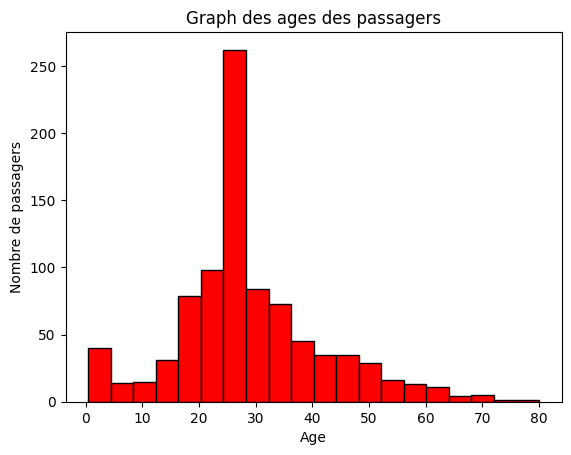

Scatter plot


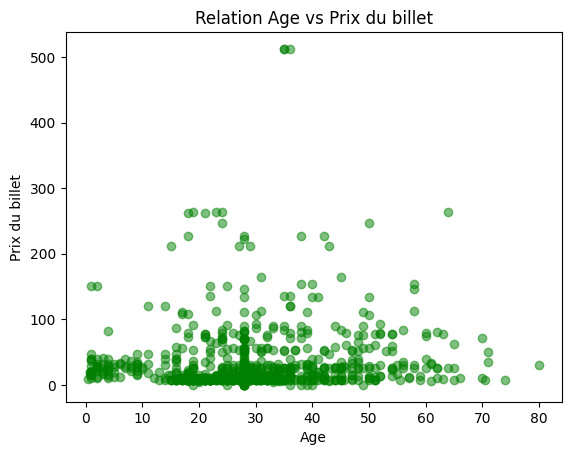

Boxplot


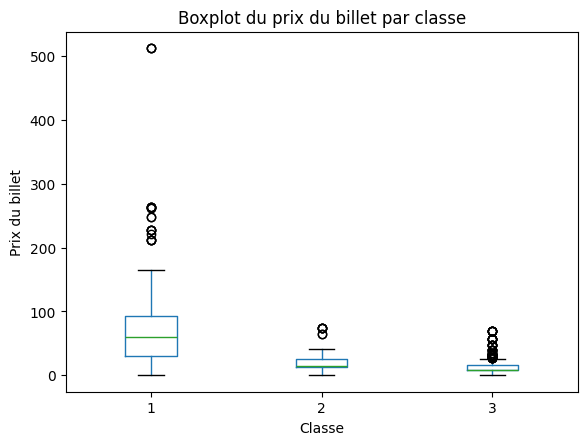

In [54]:
# Visualisation

# Histogramme
print("Histogramme")
plt.hist(df['Age'], bins=20, color='red', edgecolor='black')
plt.title("Graph des ages des passagers")
plt.xlabel("Age")
plt.ylabel("Nombre de passagers")
plt.show() 

# Scatter plot
print("Scatter plot")
plt.scatter(df['Age'], df['Fare'], alpha=0.5, color='green')
plt.title("Relation Age vs Prix du billet")
plt.xlabel("Age")
plt.ylabel("Prix du billet")
plt.show()

# Boxplot
print("Boxplot")
df.boxplot(column='Fare', by='Pclass', grid=False)
plt.title("Boxplot du prix du billet par classe")
plt.suptitle("")
plt.xlabel("Classe")
plt.ylabel("Prix du billet")
plt.show()

# Conclusion 

Pour ce rendu, j'ai opté pour le dataset Titanic (train.csv) provenant de Kaggle (https://www.kaggle.com/code/alexisbcook/titanic-tutorial/input?select=train.csv) qui contient les informations de 891 passagers du Titanic. Le dataset contient des colonnes tel que age, tarif du billet, sexe, classe, survie etc. 

En premier lieu, j'ai commencé par installer les librairies necessaires Pandas, Numpy et matplotlib ensuite j'ai chargé le dataset Titanic. Lors du nettoyage, j'ai commencé par supprimer les doublons. J'ai remplacé les valeurs manquantes de l'age par une médiane, le port d'embarquement par la valeur la plus fréquente et les cabines sans valeur par la valeure "Unknow". Et les colonnes : Survived, Sex, Embarked, Pclass ont été convertie en type category pour faciliter l'analyse. 

L'analyse statistique a révélé plusieurs observations intéressantes. La moyenne d'age est d'environ 30 ans, avec un tarif moyen du billet de 37 dollar. On observe aussi que la plupart des passagers du Titanic on pris des billets d'envrion 35 dollar.

Les visualisations prouvent que : d'apres l'histogramme la mojorité des passagers ont entre 20 et 40 ans et un nombre assez élevé d'enfant entre 0 et 3 ans, le boxplot indique que le prix du billet augmente avec la classe mais aussi que la plupart des passagers se trouvent dans la 3 eme catégorie et le scatter plot met en évidence quelques passagers ayant payé des tarifs tres élevés indépendamment de l'age.